In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import csv
import sys
import os

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("D:\Web_Development\Streamlit Deployment Projects\Crime\Crime.csv")
df.head()

D:\Team Software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,20902.0,MCPD,Retail - Department/Discount Store,L,4L2,321,11100.0,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,400 BLK GIRARD ST,GAITHERSBURG,MD,20877.0,MCFM,Residence - Apartment/Condo,P,6P3,419,400.0,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,10900 BLK GEORGIA AVE,SILVER SPRING,MD,20902.0,MCPD,Residence - Apartment/Condo,L,4L2,323,10900.0,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201230900,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,700 BLK QUINCE ORCHARD BLV,GAITHERSBURG,MD,20878.0,GPD,Street - Residential,P,6P2,554,700.0,NaN,QUINCE ORCHARD,NaN,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
4,201265312,1399,190055150,11/15/2019 03:31:20 PM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,NaN,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Street - Residential,R,6R1,505,NaN,NaN,MIDCOUNTY,NaN,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D,"(39.1593, -77.1985)"


In [3]:
df.shape

(225690, 30)

In [4]:
df.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       68799
NIBRS Code                     0
Victims                        0
Crime Name1                  141
Crime Name2                  141
Crime Name3                  141
Police District Name           0
Block Address              20502
City                        1057
State                          0
Zip Code                    3187
Agency                         0
Place                          0
Sector                        59
Beat                          59
PRA                           41
Address Number             20428
Street Prefix             215741
Street Name                    0
Street Suffix             221447
Street Type                  314
Start_Date_Time                0
End_Date_Time             116652
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

In [5]:
df.drop(columns = ['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Block Address', 'Zip Code', 'Address Number', 'Street Prefix', 'Street Suffix', 'Location'], inplace = True)

In [6]:
df.isnull().sum()

Dispatch Date / Time       68799
Victims                        0
Crime Name1                  141
Crime Name2                  141
Crime Name3                  141
Police District Name           0
City                        1057
State                          0
Agency                         0
Place                          0
Sector                        59
Beat                          59
PRA                           41
Street Name                    0
Street Type                  314
Start_Date_Time                0
End_Date_Time             116652
Latitude                       0
Longitude                      0
Police District Number         0
dtype: int64

In [7]:
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number
0,01/16/2019 03:51:46 PM,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D
1,01/27/2019 06:05:56 PM,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D
2,11/28/2019 06:08:02 AM,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D
3,03/15/2019 10:53:22 AM,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D
4,11/15/2019 03:31:20 PM,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D


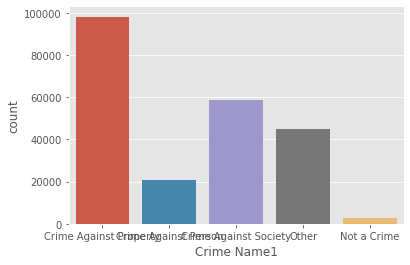

In [8]:
df['Crime Name1'].value_counts()
sb.countplot(df['Crime Name1'])

In [9]:
df['Crime Name2'].value_counts().head()


All Other Offenses                          52181
Drug/Narcotic Violations                    20920
Theft From Motor Vehicle                    19682
Simple Assault                              14881
Destruction/Damage/Vandalism of Property    13659
Name: Crime Name2, dtype: int64

In [10]:
df['Crime Name3'].value_counts().head(10)

LARCENY - FROM AUTO                    19682
DRUGS - MARIJUANA - POSSESS            14401
POLICE INFORMATION                     12783
ASSAULT - 2ND DEGREE                   12187
LARCENY - SHOPLIFTING                  11554
DRIVING UNDER THE INFLUENCE LIQUOR     11492
LARCENY (DESCRIBE OFFENSE)              9290
DAMAGE PROPERTY - PRIVATE               8657
MENTAL ILLNESS - EMERGENCY PETITION     8083
LARCENY - FROM BLDG                     7905
Name: Crime Name3, dtype: int64

In [11]:
crime = df.groupby('Crime Name1')
crime['Crime Name2'].value_counts()

Crime Name1             Crime Name2                                
Crime Against Person    Simple Assault                                 14881
                        Aggravated Assault                              2845
                        Forcible Rape                                    927
                        Fondling                                         705
                        Forcible Sodomy                                  365
                        Intimidation                                     346
                        Forcible Fondling                                336
                        Sexual Assault With An Object                    246
                        All Other Offenses                                99
                        Murder and Nonnegligent Manslaughter              74
                        Kidnapping/Abduction                              49
                        Human Trafficking, Commercial Sex Acts            36
        

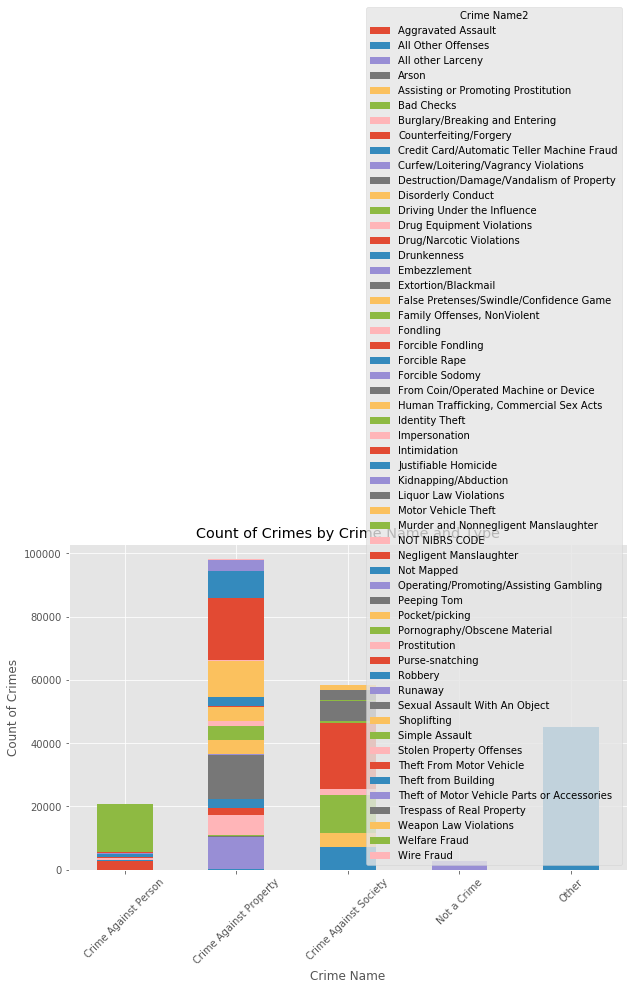

In [12]:
# Group the data by crime name and crime type
grouped_data = df.groupby(['Crime Name1', 'Crime Name2']).size().unstack()

# Plot a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the chart title and labels
ax.set_title('Count of Crimes by Crime Name and Type')
ax.set_xlabel('Crime Name')
ax.set_ylabel('Count of Crimes')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [13]:
crime = df.groupby('Crime Name1')
crime_against_person = crime.get_group('Crime Against Person')
crime_against_person_counts = crime_against_person['Crime Name2'].value_counts()
crime_against_person_counts

Simple Assault                            14881
Aggravated Assault                         2845
Forcible Rape                               927
Fondling                                    705
Forcible Sodomy                             365
Intimidation                                346
Forcible Fondling                           336
Sexual Assault With An Object               246
All Other Offenses                           99
Murder and Nonnegligent Manslaughter         74
Kidnapping/Abduction                         49
Human Trafficking, Commercial Sex Acts       36
Justifiable Homicide                          6
Negligent Manslaughter                        1
Name: Crime Name2, dtype: int64

In [14]:
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number
0,01/16/2019 03:51:46 PM,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D
1,01/27/2019 06:05:56 PM,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D
2,11/28/2019 06:08:02 AM,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D
3,03/15/2019 10:53:22 AM,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D
4,11/15/2019 03:31:20 PM,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D


In [15]:
crime3_list = df['Crime Name3'].value_counts().to_frame().quantile(0.8)

In [16]:
#top_20_percent = df['Crime Name3'].value_counts().quantile(0.8)
crime3_list

Crime Name3    392.8
Name: 0.8, dtype: float64

In [17]:
n = int(len(df['Crime Name3'].unique()) * (0/100))
top_crimes = df['Crime Name3'].value_counts().iloc[:n]

In [18]:
top_crimes

Series([], Name: Crime Name3, dtype: int64)

In [19]:
(80/100)

0.8

In [20]:
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number
0,01/16/2019 03:51:46 PM,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D
1,01/27/2019 06:05:56 PM,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D
2,11/28/2019 06:08:02 AM,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D
3,03/15/2019 10:53:22 AM,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D
4,11/15/2019 03:31:20 PM,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D


In [21]:
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'])
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df['End_Date_Time'] = pd.to_datetime(df['End_Date_Time'])


In [22]:
df['month'] = df['Start_Date_Time'].dt.month_name()
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,month
0,2019-01-16 15:51:46,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,2019-01-16 15:51:00,NaT,39.037367,-77.051662,4D,January
1,2019-01-27 18:05:56,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,2019-01-27 18:05:00,NaT,39.146531,-77.184940,6D,January
2,2019-11-28 06:08:02,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,2019-11-28 06:08:00,NaT,39.034255,-77.049163,4D,November
3,2019-03-15 10:53:22,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,2019-03-15 10:50:00,2019-03-15 10:55:00,39.141812,-77.224489,6D,March
4,2019-11-15 15:31:20,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,2019-11-15 15:20:00,NaT,39.159339,-77.198516,6D,November


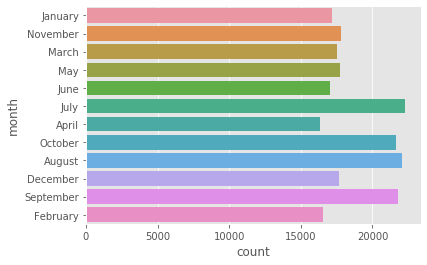

In [23]:
sb.countplot(y=df['month'])

In [24]:
df['day'] = df['Start_Date_Time'].dt.day
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,month,day
0,2019-01-16 15:51:46,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,2019-01-16 15:51:00,NaT,39.037367,-77.051662,4D,January,16
1,2019-01-27 18:05:56,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,2019-01-27 18:05:00,NaT,39.146531,-77.184940,6D,January,27
2,2019-11-28 06:08:02,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,2019-11-28 06:08:00,NaT,39.034255,-77.049163,4D,November,28
3,2019-03-15 10:53:22,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,2019-03-15 10:50:00,2019-03-15 10:55:00,39.141812,-77.224489,6D,March,15
4,2019-11-15 15:31:20,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,2019-11-15 15:20:00,NaT,39.159339,-77.198516,6D,November,15


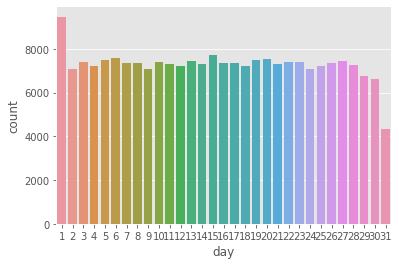

In [25]:
sb.countplot(df['day'])

In [26]:
df['day_wk'] = df['Start_Date_Time'].dt.day_name()
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,month,day,day_wk
0,2019-01-16 15:51:46,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,2019-01-16 15:51:00,NaT,39.037367,-77.051662,4D,January,16,Wednesday
1,2019-01-27 18:05:56,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,2019-01-27 18:05:00,NaT,39.146531,-77.184940,6D,January,27,Sunday
2,2019-11-28 06:08:02,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,2019-11-28 06:08:00,NaT,39.034255,-77.049163,4D,November,28,Thursday
3,2019-03-15 10:53:22,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,2019-03-15 10:50:00,2019-03-15 10:55:00,39.141812,-77.224489,6D,March,15,Friday
4,2019-11-15 15:31:20,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,2019-11-15 15:20:00,NaT,39.159339,-77.198516,6D,November,15,Friday


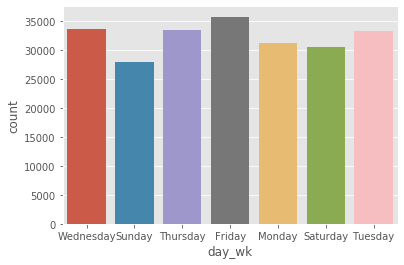

In [27]:
sb.countplot(df['day_wk'])

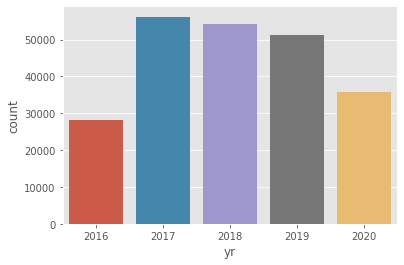

In [28]:
df['yr'] = df['Start_Date_Time'].dt.year
sb.countplot(df['yr'])

In [29]:
df.head()

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,month,day,day_wk,yr
0,2019-01-16 15:51:46,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,2019-01-16 15:51:00,NaT,39.037367,-77.051662,4D,January,16,Wednesday,2019
1,2019-01-27 18:05:56,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,MCFM,Residence - Apartment/Condo,P,6P3,419,GIRARD,ST,2019-01-27 18:05:00,NaT,39.146531,-77.184940,6D,January,27,Sunday,2019
2,2019-11-28 06:08:02,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,MCPD,Residence - Apartment/Condo,L,4L2,323,GEORGIA,AVE,2019-11-28 06:08:00,NaT,39.034255,-77.049163,4D,November,28,Thursday,2019
3,2019-03-15 10:53:22,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,GAITHERSBURG,MD,GPD,Street - Residential,P,6P2,554,QUINCE ORCHARD,BLV,2019-03-15 10:50:00,2019-03-15 10:55:00,39.141812,-77.224489,6D,March,15,Friday,2019
4,2019-11-15 15:31:20,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,MONTGOMERY VILLAGE,MD,MCPD,Street - Residential,R,6R1,505,MIDCOUNTY,HWY,2019-11-15 15:20:00,NaT,39.159339,-77.198516,6D,November,15,Friday,2019


In [30]:
df['hrs'] = df['Start_Date_Time'].dt.hour

In [31]:
df['resp_time'] = abs((df['Start_Date_Time'] - df['Dispatch Date / Time']).dt.total_seconds()/60)

# if any(df['Start_Date_Time']) >= any(df['End_Date_Time']):
#     df['resp_time'] = (df['Start_Date_Time'] - df['End_Date_Time']).dt.total_seconds() / 60
# else:
#     df['resp_time'] = 0


In [32]:
df.sample(5)

,Dispatch Date / Time,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,City,State,Agency,Place,Sector,Beat,PRA,Street Name,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,month,day,day_wk,yr,hrs,resp_time
25148,2019-10-01 15:34:14,3,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,WHEATON,SILVER SPRING,MD,MCPD,Retail - Mall,L,4L2,321,VEIRS MILL,RD,2019-10-01 13:00:00,NaT,39.037367,-77.051662,4D,October,1,Tuesday,2019,13,154.233333
98625,2018-01-30 04:18:54,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,ROCKVILLE,ROCKVILLE,MD,RCPD,Restaurant,A,1A3,244,FREDERICK,RD,2018-01-30 03:00:00,2018-01-30 03:50:00,0.000000,0.000000,1D,January,30,Tuesday,2018,3,78.900000
42794,2020-01-23 15:33:38,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,SILVER SPRING,MD,MCPD,Retail - Department/Discount Store,L,4L2,321,VEIRS MILL,RD,2020-01-21 20:28:00,NaT,39.037384,-77.051682,4D,January,21,Tuesday,2020,20,2585.633333
85074,NaT,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - COCAINE - POSSESS,BETHESDA,CHEVY CHASE,MD,MCPD,Street - Residential,D,2D1,38,WOODBROOK,LA,2017-03-23 03:00:00,NaT,38.997353,-77.067047,2D,March,23,Thursday,2017,3,NaN
43725,2020-08-24 15:01:11,1,Other,All Other Offenses,MISSING PERSON,WHEATON,SILVER SPRING,MD,MCPD,Residence -Townhouse/Duplex,J,4J1,374,ELM GROVE,CIR,2020-08-24 15:01:00,NaT,39.094103,-76.985923,4D,August,24,Monday,2020,15,0.183333


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225690 entries, 0 to 225689
Data columns (total 26 columns):
Dispatch Date / Time      156891 non-null datetime64[ns]
Victims                   225690 non-null int64
Crime Name1               225549 non-null object
Crime Name2               225549 non-null object
Crime Name3               225549 non-null object
Police District Name      225690 non-null object
City                      224633 non-null object
State                     225690 non-null object
Agency                    225690 non-null object
Place                     225690 non-null object
Sector                    225631 non-null object
Beat                      225631 non-null object
PRA                       225649 non-null object
Street Name               225690 non-null object
Street Type               225376 non-null object
Start_Date_Time           225690 non-null datetime64[ns]
End_Date_Time             109038 non-null datetime64[ns]
Latitude                  225690 

In [34]:

import geemap
import ee

from geemap import cartoee

cartopy is not installed. Please see https://scitools.org.uk/cartopy/docs/latest/installing.html#installing for instructions on how to install cartopy.

The easiest way to install cartopy is using conda: conda install -c conda-forge cartopy


In [35]:
Map = geemap.Map(center=(40, -100), zoom=4)
Map

dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
states = ee.FeatureCollection("TIGER/2018/States")

dem_vis = {
'min': 0,
'max': 4000,
'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

landsat_vis = {
    'min': 20,
    'max': 200,
    'bands': ['B4', 'B3', 'B2']
}


Map.addLayer(dem, dem_vis, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(landsat7, landsat_vis, 'Landsat 7')
Map.addLayer(states, {}, "US States")


Enter verification code:  4/1AWtgzh7P91QUh8F7kTGO_wPyMNM92BDon_k1eAr1Z3sot151xFPWRKZfIls



Successfully saved authorization token.


EEException: Not signed up for Earth Engine or project is not registered. Visit https://developers.google.com/earth-engine/guides/access